In [80]:
import random
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [81]:
def initializePoints(count):
    points = []
    for i in range(int(count/3)):
        points.append([random.gauss(0,10),random.gauss(100,10)])
    for i in range(int(count/3)):
        points.append([random.gauss(-30,20),random.gauss(10,10)])
    for i in range(int(count/3)):
        points.append([random.gauss(30,20),random.gauss(10,10)])

    return np.asarray(points)

In [82]:
class Kmeans:
    def __init__(self,k,stop_size = 1):
        self.k = k
        self.stop_size = stop_size 
        self.centroids = {} #key is k-th number, values is numpy array of points
        self.clusters = {} #key is k-th number, values is list of points in that cluster
    def fit(self, points,if_plot = True):
        iter_counter = 1
        stopping = True
        m = points.shape[0]
        
        '''intializing centroids randomly for first iteration. Key is centroid number and value is the random data point'''
        for c in range(self.k): 
            rand = random.randint(0,m-1)
            self.centroids[c] = points[rand]
            
        while(stopping):
            
            '''initialzing dict for storing previous centroids. keeping this for stopping conditions'''
            prev_centroids = copy.deepcopy(self.centroids) 
            
            '''dict where points belonging to that cluster are stored in a list as values 
            as per the closest distance to the centroid'''
            self.clusters = {}
            for i in self.centroids:
                self.clusters[i] = []
            
            '''calulating euclidean distance b/w every point and centroids & selecting the closest cluster'''
            for p in points:
                e_dist = [np.linalg.norm(p- np.asarray(self.centroids[i])) for i in self.centroids]
                self.clusters[e_dist.index(min(e_dist))].append(p)
            
            '''plotting clusters and centroids'''
            if (if_plot):
                colors = ["c","olive","plum","r","g","b","m","y","gold", ]
                color_count = 0
                for i in self.clusters:
                    for j in range(len(self.clusters[i])):
                        plt.scatter(self.clusters[i][j][0],self.clusters[i][j][1],c=colors[color_count])
                    color_count += 1
                for i in self.centroids:
                    plt.plot(self.centroids[i][0], self.centroids[i][1], color='black', marker='+', markersize=8)
                plot_title = 'Iteration number '+str(iter_counter)
                plt.title(plot_title)
                plt.show()
        
            '''recalculaiting centroids by taking mean of points in each cluster'''
            for c in self.clusters:
                self.centroids[c] = np.average(self.clusters[c], axis = 0)
                
            '''checking for stopping condition i.e. 
            All Centroids remain almost same or  distance of datapoints from their centroid is minimum'''
            flag_centroids = []
            #flag_clusters = []
            for c in self.centroids:
                if(np.linalg.norm(self.centroids[c]-prev_centroids[c]) < self.stop_size):
                    flag_centroids.append(0)
#                 if (np.array_equal(self.centroids[c],prev_centroids[c])):
#                     flag_clusters.append(0)
            if (len(flag_centroids) == self.k):
                 stopping = False
            iter_counter += 1

In [83]:
def cluster(points,K,visuals = True):
    km = Kmeans(K) #k,n_iter,stop_size = 0.01
    km.fit(points,if_plot=visuals)
    clusters = km.clusters
    return clusters

In [84]:
def clusterQuality(clusters):
    
    '''finding centroids/centroid from clusters (mean value).'''
    centroids = []
    for c in clusters:
                centroids.append(np.average(clusters[c], axis = 0))
    centroids = np.asarray(centroids)
    
    '''finding Sum of Squared centroids. '''
    score = 0 #sum of all clusters
    for i in range(len(centroids)):
        for j in clusters[i]:
            dist = (np.linalg.norm(centroids[i]-j))**2
            if dist < 0:
                print(dist)
            score += dist
    return score

In [85]:
def keepClustering(points,K,N,visuals):
    clusters = []
    min_score = math.inf
    km = Kmeans(K)
    for i in range(N):
        print('N = ',i+1)
        km.fit(points,if_plot=visuals)
        c = km.clusters
        score = clusterQuality(c)
        if score < min_score:
            min_score = score
            clusters = c
    return clusters

N =  1


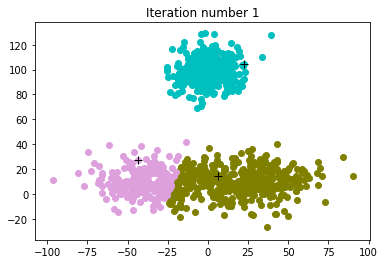

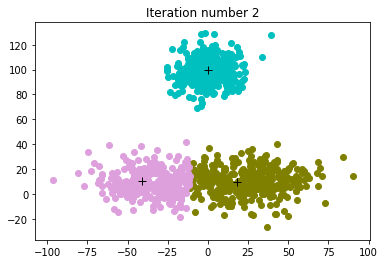

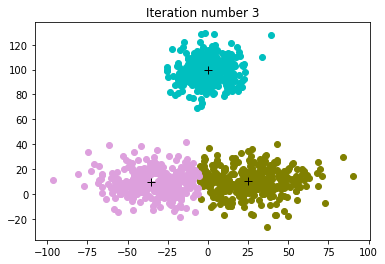

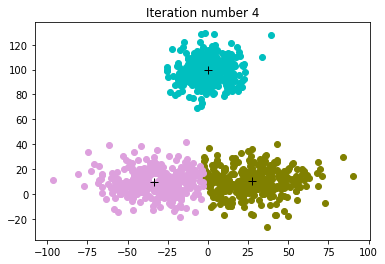

N =  2


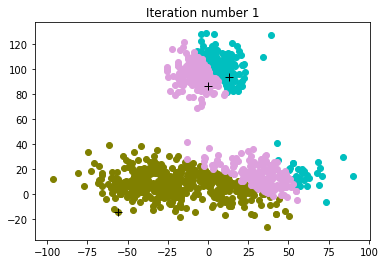

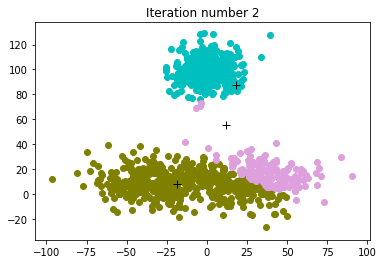

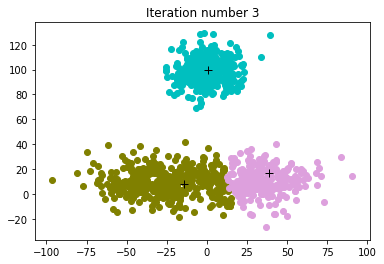

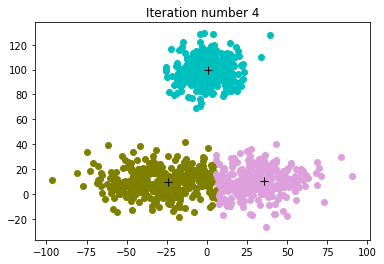

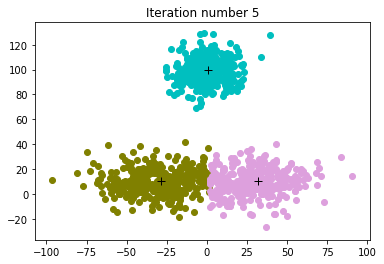

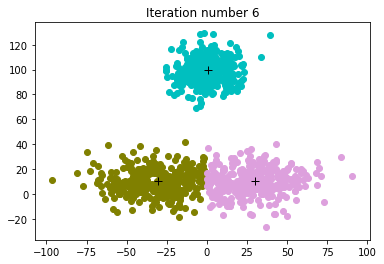

N =  3


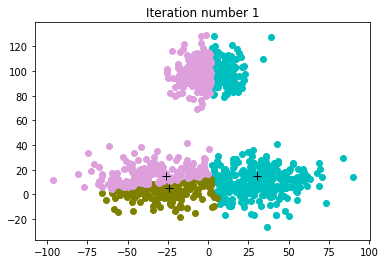

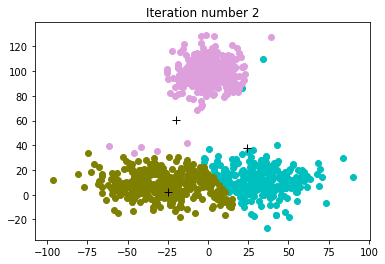

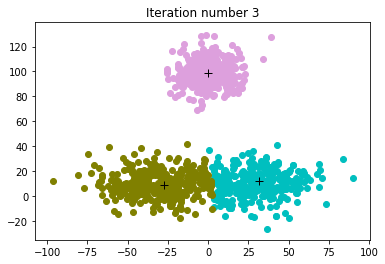

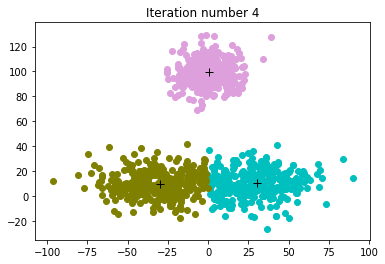

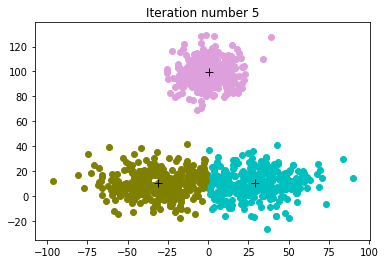

N =  4


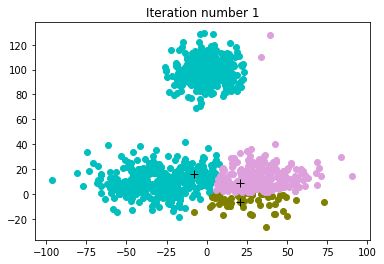

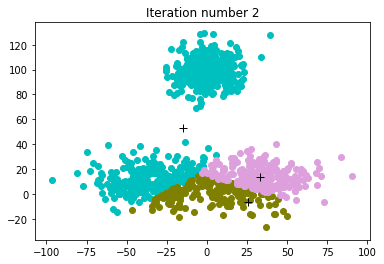

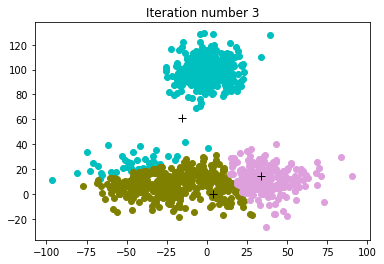

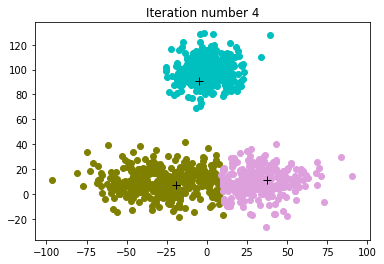

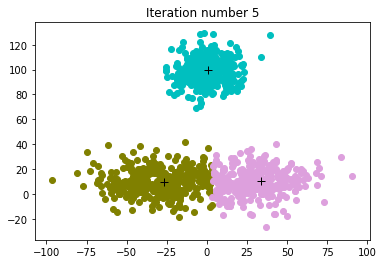

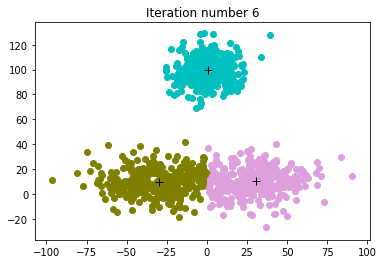

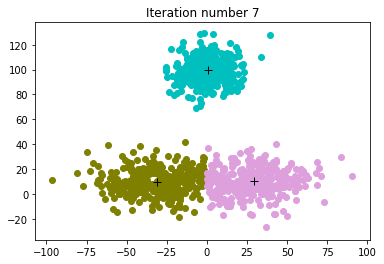

N =  5


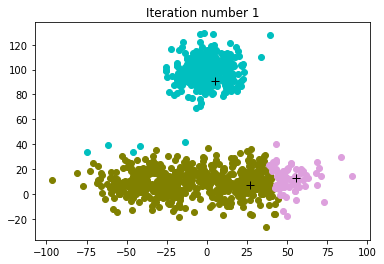

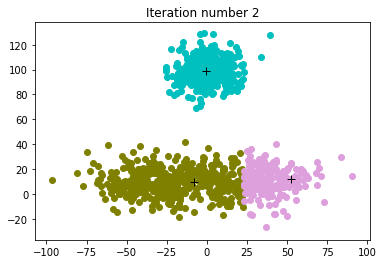

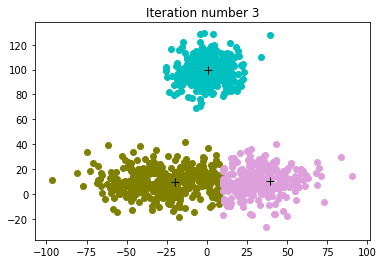

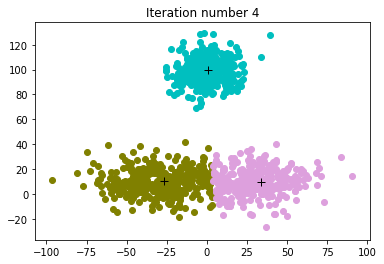

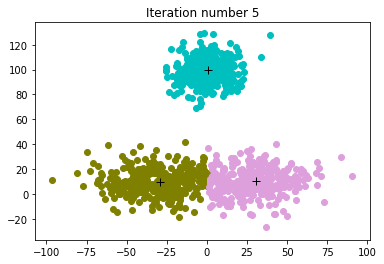

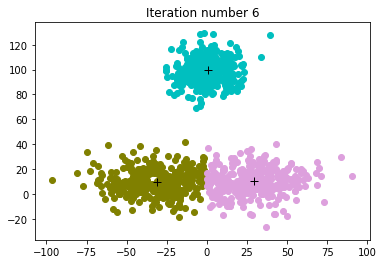

N =  6


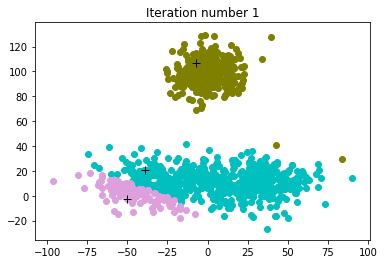

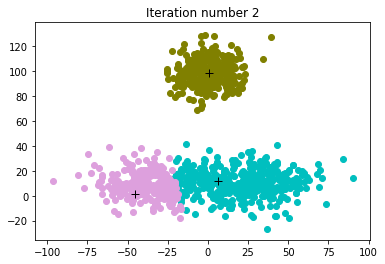

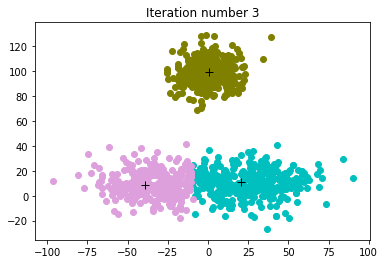

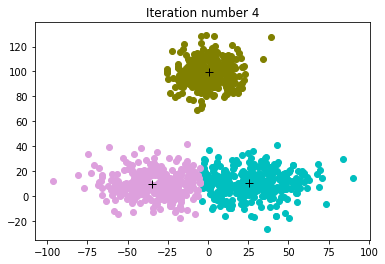

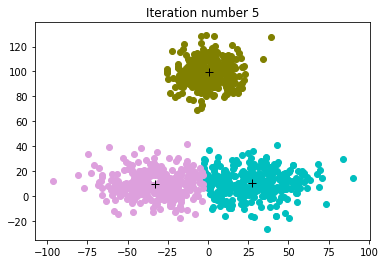

N =  7


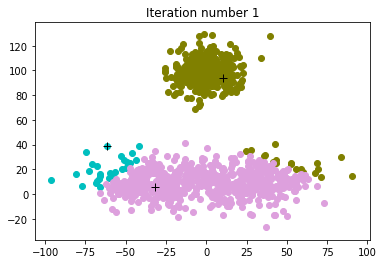

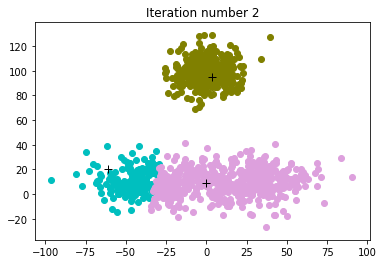

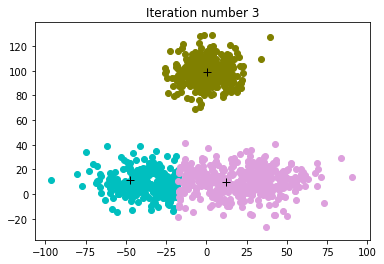

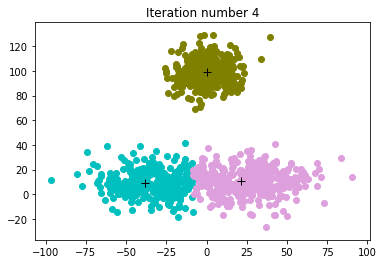

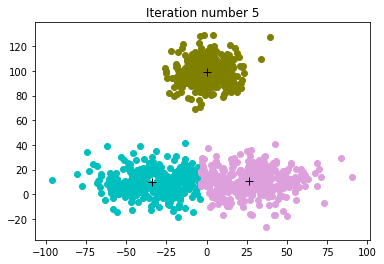

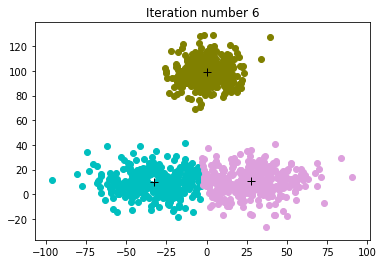

N =  8


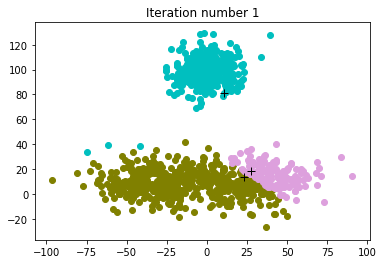

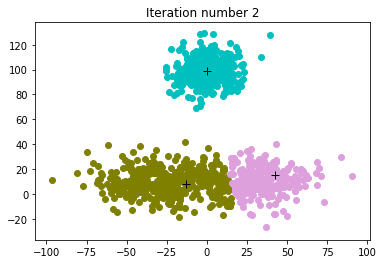

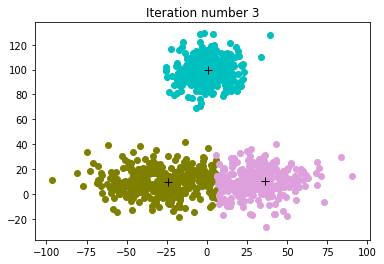

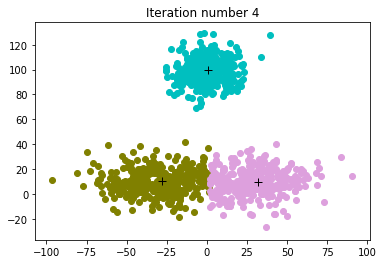

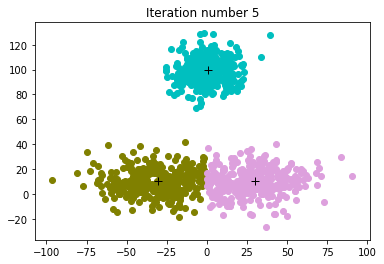

N =  9


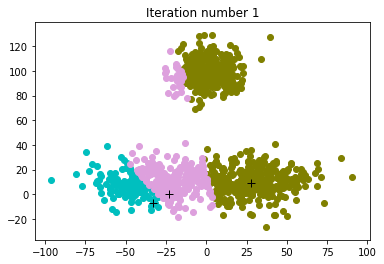

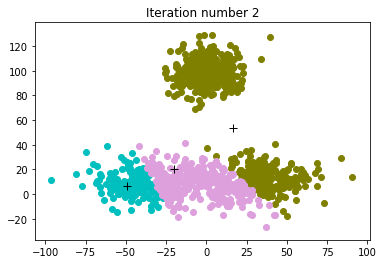

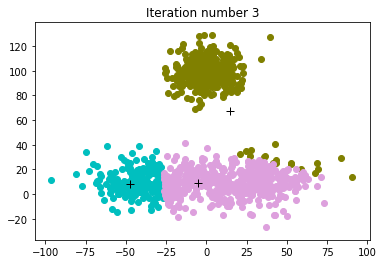

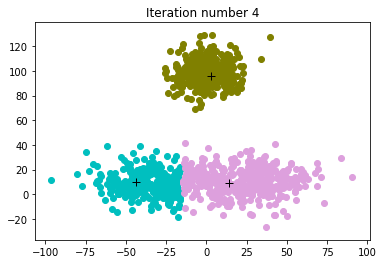

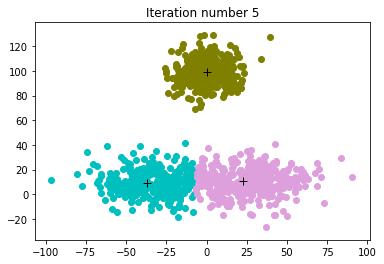

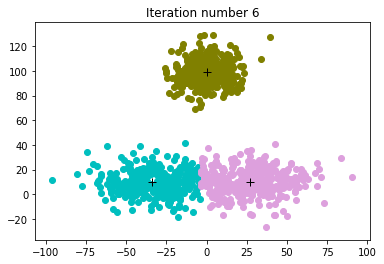

N =  10


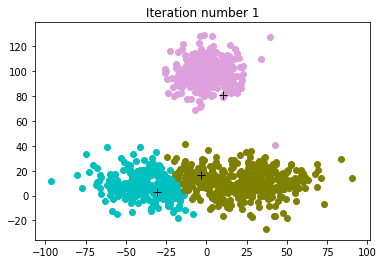

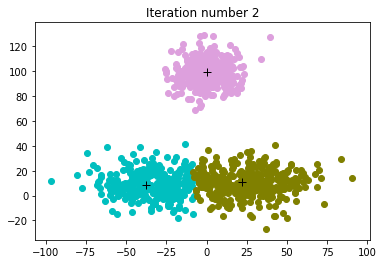

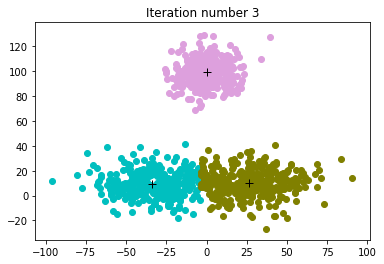

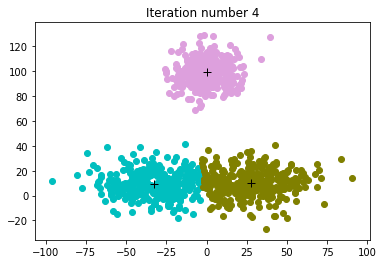

The score of best Kmeans clustering is: 344490.2002515109


In [86]:
K = 3
N = 10
points = initializePoints(1000)

# clusters = cluster(points,K,visuals = True)
# clusterQuality(clusters)
c = keepClustering(points,K,N,True)
print ("The score of best Kmeans clustering is:", clusterQuality(c))
